# Importing Laibraries

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os,glob
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Importing Dataset From Kaggle

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [5]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 80.7MB/s]
100% 15.1M/15.1M [00:00<00:00, 119MB/s] 


In [6]:
zip_ref=zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip')
zip_ref.extractall('/content')
zip_ref.close()


# Seperation Of Images & Labels On "x" and "y" Variables

In [26]:
x=[] #list for images
y=[] #list for labels


#for "yes" folder
os.chdir('/content/yes') # Change the current working directory to '/content/yes'

for i in os.listdir(): # Iterate over the files in the current directory
  img=cv2.imread(i) # Read the image file located in the current directory
  img=cv2.resize(img,(224,224)) # resize the image
  x.append(img)   # Append the resized image to the list of images
  y.append(i[0:1])  # Append the first character of the filename to the list of labels


#for "no" folder
os.chdir('/content/no') # Change the current working directory to '/content/no'

for i in os.listdir(): # Iterate over the files in the current directory
  img=cv2.imread(i) # Read the image file located in the current directory
  img=cv2.resize(img,(224,224)) # resize the image
  x.append(img)   # Append the resized image to the list of images
for i in range(1,99): # Append the first character "N" to the list of labels because we dont  have the proper name of each file in this directory
  y.append('N')



In [27]:
print(f"Total No of images:{len(x)}")
print(f"Total No of labels:{len(y)}")


Total No of images:253
Total No of labels:253


# Displaying Some  Samples

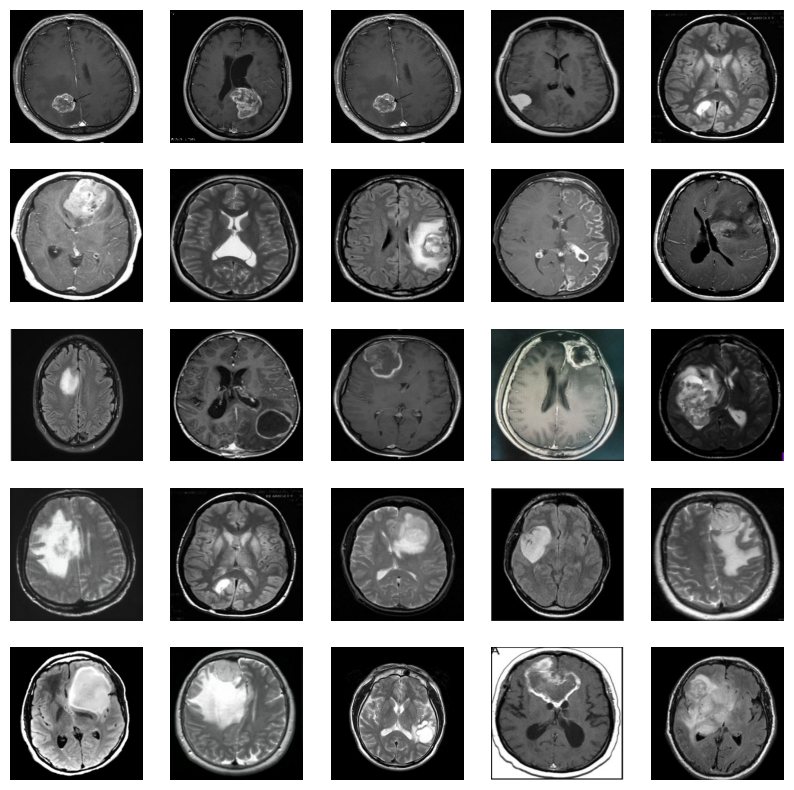

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x[i],cmap='gray')
  plt.axis('off')
plt.show()

# Unique Labels

In [29]:
#convert list to set and showing unique value because we can't shows thw unique value directly in case of list
print(set(y))

{'N', 'Y'}


## Splitting Of The Data

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Checking The Shape of The Images

In [31]:
print(f"Shape of Image in x_train:{x_train[0].shape}")
print(f"Shape of Image in x_test:{x_test[0].shape}")

Shape of Image in x_train:(224, 224, 3)
Shape of Image in x_test:(224, 224, 3)


## Encoding The Labels

In [32]:
le=LabelEncoder()

In [33]:
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

# One Hot Encoding

Converting the encoded labels in the categorical encoded form

In [34]:
#y_train=tf.keras.utils.to_categorical(y_train,num_classes=2)
#y_test=tf.keras.utils.to_categorical(y_test,num_classes=2)

## Reshape The Images

The data is in the form of list .so the model can not take the data in the form of list , we have to convert this list to array with the help of **np.array()** functionn to pass the model.

## 1. Conversion of List To Array

In [35]:
x_train= np.array(x_train)
x_test=np.array(x_test)

In [36]:
x_train.shape


(202, 224, 224, 3)

In [37]:
x_test.shape

(51, 224, 224, 3)

In [38]:
y_train.shape


(202,)

In [39]:
y_test.shape

(51,)

## Modeling With CNN

In [40]:
model=tf.keras.Sequential([

     #input layer
     tf.keras.layers.InputLayer(input_shape=(224,224,3)),

     #1 CNN Bunch
     tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
     tf.keras.layers.MaxPool2D(),


     #2 CNN Bunch
     tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
     tf.keras.layers.MaxPool2D(),


     #Drop out layer
     tf.keras.layers.Dropout(0.5),

     #Flatten layer
     tf.keras.layers.Flatten(),

     #output layer
     tf.keras.layers.Dense(1,activation='sigmoid')

])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 10)        0         
                                                                 
 flatten_1 (Flatten)         (None, 29160)            

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
6/6 [==============================] - 6s 149ms/step - loss: 79.0504 - accuracy: 0.5652 - val_loss: 18.5833 - val_accuracy: 0.6585
Epoch 2/10
6/6 [==============================] - 0s 21ms/step - loss: 18.7148 - accuracy: 0.7640 - val_loss: 23.2053 - val_accuracy: 0.7317
Epoch 3/10
6/6 [==============================] - 0s 23ms/step - loss: 10.8145 - accuracy: 0.8137 - val_loss: 7.0865 - val_accuracy: 0.6585
Epoch 4/10
6/6 [==============================] - 0s 22ms/step - loss: 7.1670 - accuracy: 0.7516 - val_loss: 3.6283 - val_accuracy: 0.8293
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 2.3117 - accuracy: 0.8634 - val_loss: 3.3518 - val_accuracy: 0.8293
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 0.4009 - accuracy: 0.9441 - val_loss: 1.9277 - val_accuracy: 0.8293
Epoch 7/10
6/6 [==============================] - 0s 22ms/step - loss: 0.4526 - accuracy: 0.9441 - val_loss: 1.9699 - val_accuracy: 0.8293
Epoch 8/10
6/6 [=====

## Grap Representation of Loss & Accuracy

### 1. Loss

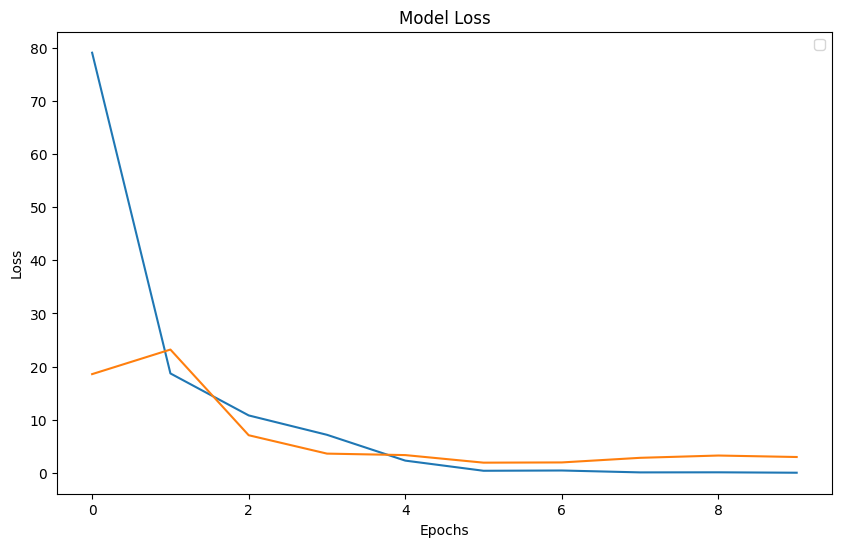

In [51]:
plt.figure(figsize=(10,6))
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### 2. accuracy

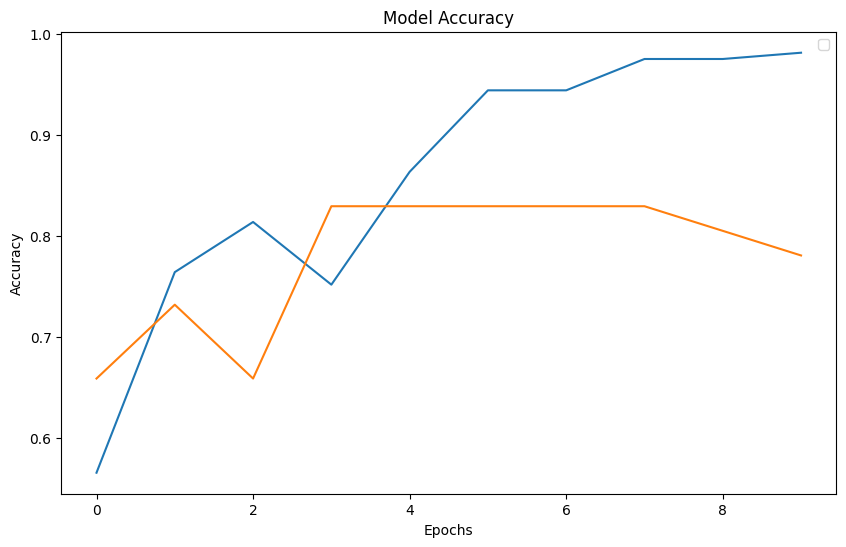

In [52]:
plt.figure(figsize=(10,6))
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## Evaluation Of Loss & Accuracy On Test Data

In [53]:
loss,accuracy=model.evaluate(x_test,y_test)


2/2 [==============================] - 0s 247ms/step - loss: 4.8936 - accuracy: 0.8235


In [54]:
print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy}")

Model Loss: 4.893625736236572
Model Accuracy: 0.8235294222831726
